MNIST数据集文件在读取时如果指定目录下不存在，就会自动去下载与读取；如果已经存在，则直接读取。

第一次执行命令时共下载了4个压缩文件，存放在新创建的和'exercise-8'同级的'MNIST_data'文件夹中。

采用one hot编码的原因：将离散特征的取值拓展到欧式空间、特征间的距离计算更合理。

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('MNIST_data/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


数据集介绍


mnist.train.num_examples  #55000
mnist.validation.num_examples #5000
mnist.test.num_examples  #10000

mnist.train.images.shape #(55000,784)
mnist.train.images[i] 是shape为(784,)的ndarray一维数组

mnist.train.labels.shape #(55000,10)
mnist.train.labels[i] 是shape为(10,)的ndarray一维数组(Cuz one_hot=True)


In [2]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

随机取一幅图输出看看

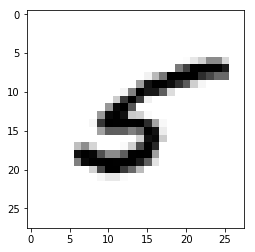

In [3]:
def plot_image(img):
    plt.imshow(img.reshape(28,28),cmap='binary')
    plt.show()
    
plot_image(mnist.train.images[np.random.randint(0,55001)])

🍃【构建模型】

Step1:定义待输入数据的占位符

In [4]:
x=tf.placeholder(tf.float32,shape=[None,784],name='X')
y=tf.placeholder(tf.float32,shape=[None,10],name='Y')

step2:定义模型变量

In [5]:
w=tf.Variable(tf.random_normal([784,10],dtype=tf.float32),name='W')
b=tf.Variable(tf.zeros([10],dtype=tf.float32),name='b')

Instructions for updating:
Colocations handled automatically by placer.


step3:定义前向计算

In [6]:
def model(w,x,b):
    return tf.matmul(x,w)+b
forward=model(w,x,b)

step4:利用softmax实现概率化输出
利用argmax得到one-hot编码下的单个预测结果与真实标签值

In [9]:
p=tf.nn.softmax(forward,axis=1)  #(None,10)
pred=tf.argmax(p,1)  #(None,)
label=tf.argmax(y,1) #(None,)

step5:定义交叉熵损失函数

In [10]:
Loss_Function=tf.reduce_mean(-tf.reduce_sum(y*tf.log(p),1))

step6:设置超参数

In [11]:
epochs=50
lr=0.05

step7:选择优化器

In [12]:
optimizer=tf.train.GradientDescentOptimizer(lr).minimize(Loss_Function)

Instructions for updating:
Use tf.cast instead.


step8:定义准确率

In [14]:
accuracy=tf.reduce_mean(tf.cast(tf.equal(pred,label),dtype=tf.float32))

🍃【训练模型】

step1:声明会话，初始化变量

In [22]:
sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

step2:训练模型（训练集用来训练、验证集用来调参）

In [23]:
batch_size=100
iterations=int(len(mnist.train.labels)/batch_size)

for epoch in range(epochs):
    for iteration in range(iterations):
        batch_train_images,batch_train_labels=mnist.train.next_batch(batch_size)
        #在训练集上训练（小批量）
        sess.run(optimizer,feed_dict={x:batch_train_images,y:batch_train_labels})

#         错误示范        
#         _,loss,acc=sess.run([optimizer,Loss_Function,accuracy],\
#                             feed_dict={x:batch_train_images,y:batch_train_labels})
    
    #每一轮的所有批次训练完后，使用验证集计算损失和准确率
    loss_validation,acc_validation=sess.run([Loss_Function,accuracy],\
                                            feed_dict={x:mnist.validation.images,y:mnist.validation.labels})
    
    print ('第%d轮'%(epoch+1),'loss%.4f'%loss_validation,'acc%.4f'%acc_validation)
    

第1轮 loss1.8130 acc0.6602
第2轮 loss1.2402 acc0.7544
第3轮 loss1.0237 acc0.7898
第4轮 loss0.9069 acc0.8158
第5轮 loss0.8278 acc0.8276
第6轮 loss0.7698 acc0.8352
第7轮 loss0.7281 acc0.8430
第8轮 loss0.6915 acc0.8492
第9轮 loss0.6633 acc0.8570
第10轮 loss0.6361 acc0.8598
第11轮 loss0.6158 acc0.8642
第12轮 loss0.5957 acc0.8660
第13轮 loss0.5803 acc0.8692
第14轮 loss0.5667 acc0.8716
第15轮 loss0.5511 acc0.8746
第16轮 loss0.5402 acc0.8756
第17轮 loss0.5305 acc0.8780
第18轮 loss0.5209 acc0.8782
第19轮 loss0.5136 acc0.8812
第20轮 loss0.5046 acc0.8832
第21轮 loss0.4963 acc0.8842
第22轮 loss0.4902 acc0.8858
第23轮 loss0.4838 acc0.8880
第24轮 loss0.4780 acc0.8868
第25轮 loss0.4709 acc0.8892
第26轮 loss0.4660 acc0.8898
第27轮 loss0.4622 acc0.8910
第28轮 loss0.4587 acc0.8914
第29轮 loss0.4540 acc0.8928
第30轮 loss0.4481 acc0.8932
第31轮 loss0.4436 acc0.8938
第32轮 loss0.4402 acc0.8946
第33轮 loss0.4379 acc0.8970
第34轮 loss0.4344 acc0.8974
第35轮 loss0.4311 acc0.8980
第36轮 loss0.4280 acc0.8978
第37轮 loss0.4250 acc0.8970
第38轮 loss0.4227 acc0.8986
第39轮 loss0.4202 acc0.

step3:评估模型（测试集）

In [24]:
#所有epochs完成后，在测试集上评估模型准确率
acc_test=sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
print ('Test Accuracy:', acc_test)

#不妨也输出看看所有epochs完成后，在训练集和验证集上的模型准确率,比较看看
acc_train=sess.run(accuracy,feed_dict={x:mnist.train.images,y:mnist.train.labels})
print ('Train Accuracy:',acc_train)
acc_valid=sess.run(accuracy,feed_dict={x:mnist.validation.images,y:mnist.validation.labels})
print ('Validation Accuracy:',acc_valid)


Test Accuracy: 0.8978
Train Accuracy: 0.9
Validation Accuracy: 0.9


🍃【模型应用与可视化】

step1:应用模型（测试集）

In [26]:
imgs=mnist.test.images[0:25]
preds=sess.run(pred,feed_dict={x:mnist.test.images[0:25]})
print('预测标签：',preds)

labels=sess.run(label,feed_dict={y:mnist.test.labels[0:25]})
print ('真实标签：',labels)

预测标签： [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]
真实标签： [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]


step2:结果可视化（图形式）

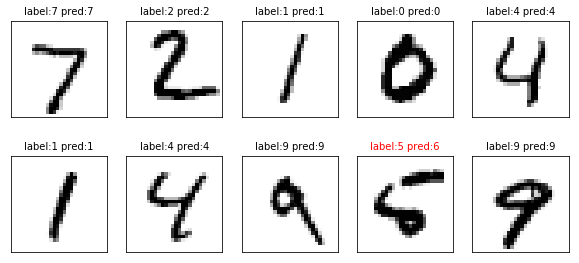

In [36]:
#index表示从第index+1个数据开始连续输出25个手写数字图
def plot_images_labels(imgs,labels,preds,index,num=10):
    fig=plt.figure(figsize=(10,12))
    for i in range(num):
        plt.subplot(5,5,i+1)
        plt.imshow(imgs[index+i].reshape(28,28),cmap='binary')
        
        label=labels[index+i]
        pred=preds[index+i]
        if label!=pred:
            color='red'
        else:
            color='black'
        title='label:{} pred:{}'.format(label,pred)
        plt.title(title,fontsize=10,color=color)
        
        plt.xticks([])
        plt.yticks([])
    plt.show()
    
plot_images_labels(imgs,labels,preds,0)
